In [1]:
import os

models_paths = [os.environ["DATA"] + "/03_paper_popalg/04_SAScore_opt/01.04_baseline_SAScore_opt_from_none"]

model_names = ["SAScore_baseline"]

output_fig_dir = os.environ["FIGURES"] + "/03_paper_popalg/03_SAScore_opt/02.04_baseline_SAScore_opt_from_none"


In [2]:
from qupopalg.plot_results import extract_data_multiple_models

union_models_data_dict = extract_data_multiple_models(models_paths, model_names, fix_dict={"scf": "scaf", 
                                                                                           "ifg": "efg",
                                                                                           "max": "best"})

### Fixing SAScore

In [3]:
for k in union_models_data_dict.keys():
    for k_df in union_models_data_dict[k].keys():
        if "SAScore" in k_df and "std" not in k_df:
            union_models_data_dict[k][k_df] = -union_models_data_dict[k][k_df] 
    

### Potting time vs step

In [4]:
from qupopalg.plot_results import plot_time_vs_step

plot_time_vs_step(union_models_data_dict, output_fig_dir)


<Figure size 432x288 with 0 Axes>

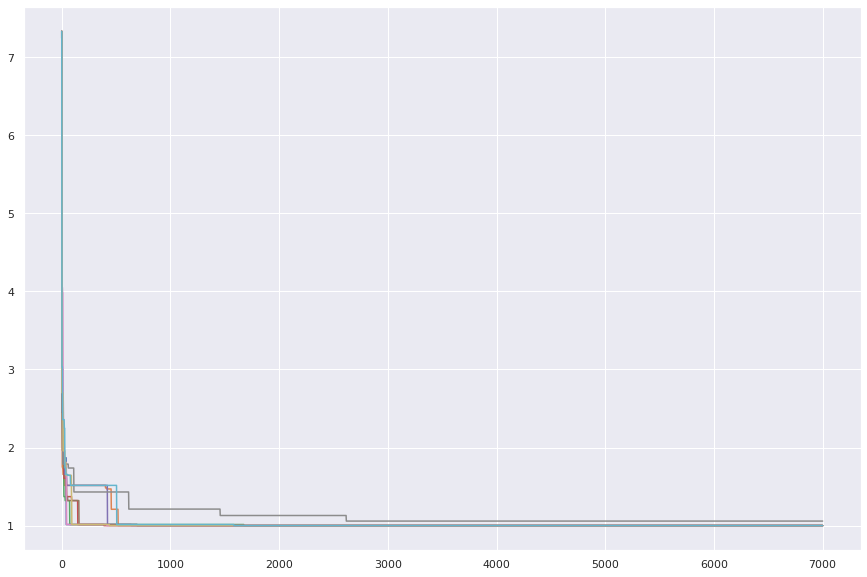

In [5]:
import numpy as np

qed_max = union_models_data_dict["steps"]["SAScore_best"][union_models_data_dict["steps"]["run"] == "9"].to_numpy()
qed_max_sorted = np.sort(qed_max)

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i in range(10):
    sns.lineplot(np.arange(len(union_models_data_dict["steps"]["SAScore_best"][union_models_data_dict["steps"]["run"] == str(i)].to_numpy())),
        union_models_data_dict["steps"]["SAScore_best"][union_models_data_dict["steps"]["run"] == str(i)].to_numpy())

### Plotting objective functions vs step 

In [ ]:
from qupopalg.plot_results import plot_steps_property

plot_steps_property(union_models_data_dict, "SAScore", ["best", "mean"], ["SAScore_best", "SAScore_mean"],
                    output_dir_path=output_fig_dir)

### Plotting all properties vs step 

In [ ]:
from qupopalg.plot_results import plot_steps_multi_properties

union_models_data_dict["steps"]["k_desc_scaf_active_value"] = union_models_data_dict["steps"]["k_desc_scaf_active_desc"] 
union_models_data_dict["steps"]["k_desc_efg_active_value"] = union_models_data_dict["steps"]["k_desc_efg_active_desc"] 
union_models_data_dict["steps"]["k_desc_shg_active_value"] = union_models_data_dict["steps"]["k_desc_shg_active_desc"] 

plot_steps_multi_properties(union_models_data_dict, ["qed", "penalized_logP", "CLScore", "SAScore"], ["best", "mean"], output_fig_dir)
plot_steps_multi_properties(union_models_data_dict, ["k_desc_scaf_active", "k_desc_efg_active", "k_desc_shg_active"], ["value"], output_fig_dir+"_desc")


### Plotting property distribution

In [ ]:
from qupopalg.plot_results import plot_prop_distribution_pop

plot_prop_distribution_pop(union_models_data_dict, "SAScore", output_fig_dir, run="0")

### Plotting objective function vs time

In [ ]:
plot_steps_property(union_models_data_dict, "SAScore", ["best", "mean"], ["SAScore_best", "SAScore_mean"],
                    output_dir_path=output_fig_dir, x_key="timestamps")

### Plotting # no ind replaced

In [ ]:
from qupopalg.plot_results import plot_n_errors_per_step

plot_n_errors_per_step(union_models_data_dict, "No individual replaced", model_names=model_names, output_dir_path=output_fig_dir)

### Plotting # MM errors vs step

In [ ]:
from qupopalg.plot_results import plot_n_errors_per_step

plot_n_errors_per_step(union_models_data_dict, "MM", model_names=model_names, output_dir_path=output_fig_dir)